# MORE RETAIL LIMITED

In [1]:
# Let's import the main libraries that I will use in this dataset.
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
# Display up to 9 columns of a dataframe
pd.set_option('display.max_columns', 9)
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Set default font size
plt.rcParams['font.size'] = 24
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)


In [2]:
import datetime

In [3]:
#read the data 
path ="C:/Users/mayur/Desktop/retail_more.csv"
data=pd.read_csv(path)
data

,date,order_no,format,division_name,orderval,rcvval
0,2020-10-18,1.0,sm,Staples,"9,732.8","9,732.8"
1,2020-10-16,2.0,sm,Grocery Food,558.7,558.7
2,2020-10-20,3.0,sm,Grocery Non Food,"2,927.0","2,927.0"
3,2020-10-21,4.0,sm,Grocery Food,906.0,906.0
4,2020-10-27,5.0,sm,Grocery Food,988.6,988.6
...,...,...,...,...,...,...
11901,2020-10-26,"11,902.0",hm,Grocery Non Food,458.3,NaN
11902,2020-10-23,"11,903.0",hm,Grocery Food,"2,486.9",NaN
11903,2020-10-26,"11,904.0",hm,Grocery Food,"1,138.3",NaN
11904,2020-10-22,"11,905.0",hm,Grocery Food,"1,24,081.0",NaN


In [4]:
# removing "," from all integer fields
data['orderval'] = data['orderval'].str.replace(",","")
data['rcvval'] = data['rcvval'].str.replace(",","")
data['order_no'] = data['order_no'].str.replace(",","")
data

,date,order_no,format,division_name,orderval,rcvval
0,2020-10-18,1.0,sm,Staples,9732.8,9732.8
1,2020-10-16,2.0,sm,Grocery Food,558.7,558.7
2,2020-10-20,3.0,sm,Grocery Non Food,2927.0,2927.0
3,2020-10-21,4.0,sm,Grocery Food,906.0,906.0
4,2020-10-27,5.0,sm,Grocery Food,988.6,988.6
...,...,...,...,...,...,...
11901,2020-10-26,11902.0,hm,Grocery Non Food,458.3,NaN
11902,2020-10-23,11903.0,hm,Grocery Food,2486.9,NaN
11903,2020-10-26,11904.0,hm,Grocery Food,1138.3,NaN
11904,2020-10-22,11905.0,hm,Grocery Food,124081.0,NaN


In [5]:
#data summary 
data.describe(include="all")

,date,order_no,format,division_name,orderval,rcvval
count,11906,11906,11906,11906,9558,3792
unique,17,11906,2,3,4311,2252
top,2020-10-20,10316.0,sm,Grocery Food,1554.1,1554.1
freq,1516,1,8844,7308,120,56


In [6]:
data.dtypes

date             object
order_no         object
format           object
division_name    object
orderval         object
rcvval           object
dtype: object

In [7]:
#EDA
#NULL CHECK
data.isnull().sum()

date                0
order_no            0
format              0
division_name       0
orderval         2348
rcvval           8114
dtype: int64

In [8]:
#CONVERTING DATA INTO BELONGING DATATYPES
data.format = data.format.astype('category')
data.division_name = data.division_name.astype('category')

In [9]:
data.orderval = data.orderval.astype('float')
data.rcvval = data.rcvval.astype('float')
data.order_no = data.order_no.astype('float')

In [10]:
# Changing the date column to a Time Interval columnn
data.date = pd.DatetimeIndex(data.date)
data.dtypes

date             datetime64[ns]
order_no                float64
format                 category
division_name          category
orderval                float64
rcvval                  float64
dtype: object

In [11]:
#data.orderval = data.orderval.dropna()
#data.rcvval = data.rcvval.dropna()
#EDA
#NULL CHECK
data.isnull().sum()

date                0
order_no            0
format              0
division_name       0
orderval         2348
rcvval           8114
dtype: int64

In [13]:
#REMOVING NULL VALUES
df = data.dropna(how='any',axis=0)
df

,date,order_no,format,division_name,orderval,rcvval
0,2020-10-18,1.0,sm,Staples,9732.8,9732.8
1,2020-10-16,2.0,sm,Grocery Food,558.7,558.7
2,2020-10-20,3.0,sm,Grocery Non Food,2927.0,2927.0
3,2020-10-21,4.0,sm,Grocery Food,906.0,906.0
4,2020-10-27,5.0,sm,Grocery Food,988.6,988.6
...,...,...,...,...,...,...
9819,2020-10-23,9820.0,hm,Grocery Food,2811.4,2811.4
9832,2020-10-16,9833.0,hm,Grocery Food,4114.3,4114.3
9833,2020-10-21,9834.0,hm,Grocery Non Food,1080.6,1080.6
9834,2020-10-20,9835.0,hm,Grocery Food,421.1,421.1


In [14]:
#SORTING THE DATASET AS PER DATE
df = df.sort_values(by='date',ascending=True)
df

,date,order_no,format,division_name,orderval,rcvval
1536,2020-10-15,1537.0,sm,Staples,333.3,333.3
1751,2020-10-15,1752.0,sm,Staples,5400.0,5400.0
3259,2020-10-15,3260.0,sm,Grocery Food,996.5,996.5
529,2020-10-15,530.0,sm,Grocery Food,2463.6,2463.6
3280,2020-10-15,3281.0,sm,Staples,560.0,560.0
...,...,...,...,...,...,...
3536,2020-10-27,3537.0,sm,Grocery Food,988.6,988.6
1871,2020-10-27,1872.0,sm,Grocery Food,706.2,699.1
2653,2020-10-27,2654.0,sm,Grocery Food,988.6,988.6
472,2020-10-27,473.0,sm,Grocery Food,988.6,988.6


In [15]:
#OBSERVING DISTRIBUTION OF CATEGORICAL LEVELS
df['division_name'].value_counts()

Grocery Food        2316
Grocery Non Food    1282
Staples              194
Name: division_name, dtype: int64

In [16]:
df['format'].value_counts()

sm    3766
hm      26
Name: format, dtype: int64

In [17]:
#ADDING NEW COLUMN SUCH THAT mathematical operation  (rcvval/orderval)
df['fillrate'] = df['rcvval']/df['orderval']
df

,date,order_no,format,division_name,orderval,rcvval,fillrate
1536,2020-10-15,1537.0,sm,Staples,333.3,333.3,1.000000
1751,2020-10-15,1752.0,sm,Staples,5400.0,5400.0,1.000000
3259,2020-10-15,3260.0,sm,Grocery Food,996.5,996.5,1.000000
529,2020-10-15,530.0,sm,Grocery Food,2463.6,2463.6,1.000000
3280,2020-10-15,3281.0,sm,Staples,560.0,560.0,1.000000
...,...,...,...,...,...,...,...
3536,2020-10-27,3537.0,sm,Grocery Food,988.6,988.6,1.000000
1871,2020-10-27,1872.0,sm,Grocery Food,706.2,699.1,0.989946
2653,2020-10-27,2654.0,sm,Grocery Food,988.6,988.6,1.000000
472,2020-10-27,473.0,sm,Grocery Food,988.6,988.6,1.000000


In [31]:
df

,date,order_no,format,division_name,orderval,rcvval,fillrate
1536,2020-10-15,1537.0,sm,Staples,333.3,333.3,1.000000
1751,2020-10-15,1752.0,sm,Staples,5400.0,5400.0,1.000000
3259,2020-10-15,3260.0,sm,Grocery Food,996.5,996.5,1.000000
529,2020-10-15,530.0,sm,Grocery Food,2463.6,2463.6,1.000000
3280,2020-10-15,3281.0,sm,Staples,560.0,560.0,1.000000
...,...,...,...,...,...,...,...
3536,2020-10-27,3537.0,sm,Grocery Food,988.6,988.6,1.000000
1871,2020-10-27,1872.0,sm,Grocery Food,706.2,699.1,0.989946
2653,2020-10-27,2654.0,sm,Grocery Food,988.6,988.6,1.000000
472,2020-10-27,473.0,sm,Grocery Food,988.6,988.6,1.000000


In [33]:
#saving the cleaned dataset , so that we can use for sql which we will convert into csv before importing in sql
df.to_excel('more_retail_dataset.xlsx')

In [18]:
#OBSERVIBG THE COUNT OF division_name WITH RESPECT TO format
df.groupby(['format' , 'division_name']).size().reset_index(name='Count')


,format,division_name,Count
0,hm,Grocery Food,22
1,hm,Grocery Non Food,4
2,hm,Staples,0
3,sm,Grocery Food,2294
4,sm,Grocery Non Food,1278
5,sm,Staples,194


In [19]:
# applying groupby() function to
# group the data on team value.
gk = df.groupby('format')
  
# Let's print the first entries
# in all the groups formed.
gk.first()

,date,order_no,division_name,orderval,rcvval,fillrate
format,,,,,,
hm,2020-10-15,9817.0,Grocery Food,2641.4,2641.4,1.0
sm,2020-10-15,1537.0,Staples,333.3,333.3,1.0


In [20]:
# Finding the values contained in the "hm" group
gk.get_group('hm')

,date,order_no,format,division_name,orderval,rcvval,fillrate
9816,2020-10-15,9817.0,hm,Grocery Food,2641.4,2641.4,1.0
9810,2020-10-16,9811.0,hm,Grocery Food,1186.4,1186.4,1.0
9832,2020-10-16,9833.0,hm,Grocery Food,4114.3,4114.3,1.0
9814,2020-10-17,9815.0,hm,Grocery Food,1761.4,1761.4,1.0
9812,2020-10-17,9813.0,hm,Grocery Food,2516.4,2516.4,1.0
9813,2020-10-19,9814.0,hm,Grocery Food,8299.4,8299.4,1.0
9808,2020-10-19,9809.0,hm,Grocery Food,2009.2,2009.2,1.0
9815,2020-10-19,9816.0,hm,Grocery Food,37632.0,37632.0,1.0
9834,2020-10-20,9835.0,hm,Grocery Food,421.1,421.1,1.0
9806,2020-10-20,9807.0,hm,Grocery Food,847.4,847.4,1.0


In [21]:
# Finding the values contained in the "sm" group
gk.get_group('sm')

,date,order_no,format,division_name,orderval,rcvval,fillrate
1536,2020-10-15,1537.0,sm,Staples,333.3,333.3,1.000000
1751,2020-10-15,1752.0,sm,Staples,5400.0,5400.0,1.000000
3259,2020-10-15,3260.0,sm,Grocery Food,996.5,996.5,1.000000
529,2020-10-15,530.0,sm,Grocery Food,2463.6,2463.6,1.000000
3280,2020-10-15,3281.0,sm,Staples,560.0,560.0,1.000000
...,...,...,...,...,...,...,...
3536,2020-10-27,3537.0,sm,Grocery Food,988.6,988.6,1.000000
1871,2020-10-27,1872.0,sm,Grocery Food,706.2,699.1,0.989946
2653,2020-10-27,2654.0,sm,Grocery Food,988.6,988.6,1.000000
472,2020-10-27,473.0,sm,Grocery Food,988.6,988.6,1.000000


In [22]:
# applying groupby() function to
# group the data on team value.
gk = df.groupby('division_name')
  
# Let's print the first entries
# in all the groups formed.
gk.first()

,date,order_no,format,orderval,rcvval,fillrate
division_name,,,,,,
Grocery Food,2020-10-15,3260.0,sm,996.5,996.5,1.0
Grocery Non Food,2020-10-15,2543.0,sm,5410.0,5410.0,1.0
Staples,2020-10-15,1537.0,sm,333.3,333.3,1.0


In [23]:
# Finding the values contained in the "Boston Celtics" group
gk.get_group('Grocery Food')

,date,order_no,format,division_name,orderval,rcvval,fillrate
3259,2020-10-15,3260.0,sm,Grocery Food,996.5,996.5,1.000000
529,2020-10-15,530.0,sm,Grocery Food,2463.6,2463.6,1.000000
1109,2020-10-15,1110.0,sm,Grocery Food,287.1,287.1,1.000000
363,2020-10-15,364.0,sm,Grocery Food,1512.4,1512.4,1.000000
1190,2020-10-15,1191.0,sm,Grocery Food,2578.0,2578.0,1.000000
...,...,...,...,...,...,...,...
3536,2020-10-27,3537.0,sm,Grocery Food,988.6,988.6,1.000000
1871,2020-10-27,1872.0,sm,Grocery Food,706.2,699.1,0.989946
2653,2020-10-27,2654.0,sm,Grocery Food,988.6,988.6,1.000000
472,2020-10-27,473.0,sm,Grocery Food,988.6,988.6,1.000000


In [24]:
# Finding the values contained in the "Boston Celtics" group
gk.get_group('Grocery Non Food')

,date,order_no,format,division_name,orderval,rcvval,fillrate
2542,2020-10-15,2543.0,sm,Grocery Non Food,5410.0,5410.0,1.0
1181,2020-10-16,1182.0,sm,Grocery Non Food,7706.8,7706.8,1.0
4266,2020-10-16,4267.0,sm,Grocery Non Food,1918.1,1918.1,1.0
2474,2020-10-16,2475.0,sm,Grocery Non Food,7792.5,7792.5,1.0
3709,2020-10-17,3710.0,sm,Grocery Non Food,2192.1,2192.1,1.0
...,...,...,...,...,...,...,...
686,2020-10-26,687.0,sm,Grocery Non Food,1477.5,1477.5,1.0
1848,2020-10-26,1849.0,sm,Grocery Non Food,2117.3,2117.3,1.0
1207,2020-10-26,1208.0,sm,Grocery Non Food,4002.8,4002.8,1.0
2528,2020-10-26,2529.0,sm,Grocery Non Food,1539.9,1539.9,1.0


In [25]:
# Finding the values contained in the "Boston Celtics" group
gk.get_group('Staples')

,date,order_no,format,division_name,orderval,rcvval,fillrate
1536,2020-10-15,1537.0,sm,Staples,333.3,333.3,1.0
1751,2020-10-15,1752.0,sm,Staples,5400.0,5400.0,1.0
3280,2020-10-15,3281.0,sm,Staples,560.0,560.0,1.0
3291,2020-10-15,3292.0,sm,Staples,5729.5,5729.5,1.0
1987,2020-10-15,1988.0,sm,Staples,373.3,373.3,1.0
...,...,...,...,...,...,...,...
1679,2020-10-21,1680.0,sm,Staples,6164.0,6164.0,1.0
1671,2020-10-22,1672.0,sm,Staples,28224.0,28224.0,1.0
2245,2020-10-22,2246.0,sm,Staples,10522.4,10522.4,1.0
1634,2020-10-23,1635.0,sm,Staples,12787.2,12787.2,1.0


Grocery Food        2316
Grocery Non Food    1282
Staples              194
Name: division_name, dtype: int64

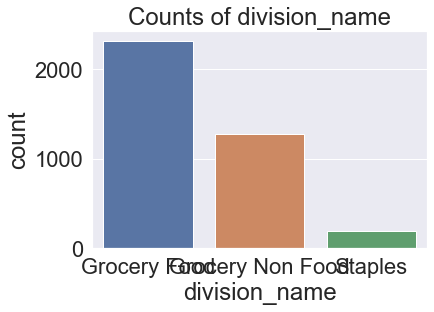

In [63]:
sns.countplot(x='division_name' , data=df , order = df['division_name'].value_counts().index)
plt.title('Counts of division_name')
df.division_name.value_counts()

sm    3766
hm      26
Name: format, dtype: int64

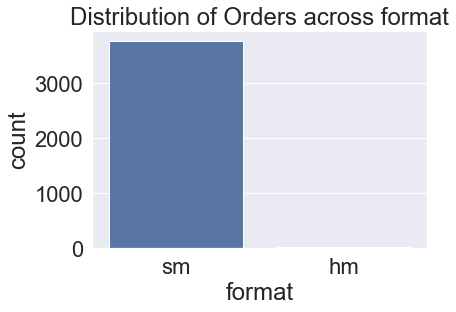

In [64]:
sns.countplot(x='format',data=df,order = df['format'].value_counts().index)
plt.title('Distribution of Orders across format')
df.format.value_counts()

In [47]:
df.groupby(['date','orderval']).size().reset_index(name='Count')
# Here we found that both columns have high similarity. so we can remove any one columns.


,date,orderval,Count
0,2020-10-15,133.3,1
1,2020-10-15,257.0,1
2,2020-10-15,287.1,1
3,2020-10-15,333.3,1
4,2020-10-15,373.3,1
...,...,...,...
3156,2020-10-27,3086.8,1
3157,2020-10-27,3355.8,1
3158,2020-10-27,3455.4,1
3159,2020-10-27,5428.4,1


In [49]:
data.groupby(['date' ,'division_name']).size().reset_index(name='Count')

,date,division_name,Count
0,2020-10-13,Grocery Food,47
1,2020-10-13,Grocery Non Food,25
2,2020-10-13,Staples,15
3,2020-10-14,Grocery Food,110
4,2020-10-14,Grocery Non Food,11
5,2020-10-14,Staples,7
6,2020-10-15,Grocery Food,98
7,2020-10-15,Grocery Non Food,31
8,2020-10-15,Staples,20
9,2020-10-16,Grocery Food,299


In [48]:
data.groupby(['format' ,'orderval']).size().reset_index(name='Count')

,format,orderval,Count
0,hm,97.6,1
1,hm,112.4,0
2,hm,113.8,0
3,hm,126.0,0
4,hm,126.1,1
...,...,...,...
8617,sm,278250.0,2
8618,sm,294667.8,1
8619,sm,343238.6,1
8620,sm,473329.3,1


C:\Users\mayur\anaconda3\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

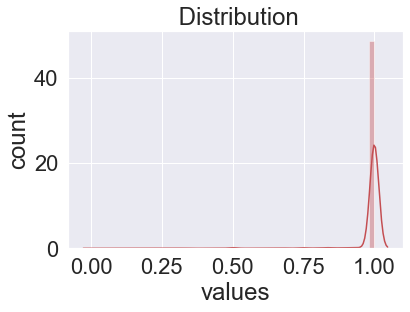

In [55]:
#6) Distribution plot 
sns.distplot(df.fillrate,hist=True,color='r',label='orderval')
plt.title(' Distribution')
plt.xlabel('values')
plt.ylabel('count')

Text(0.5, 1.0, 'Distribution of Orders across date')

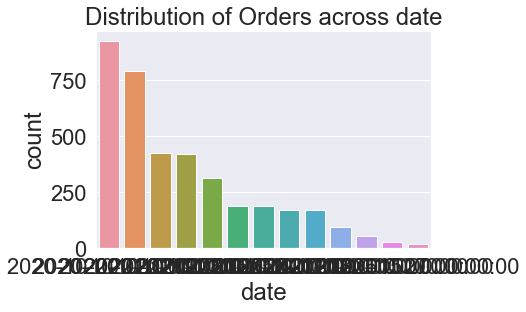

In [53]:
sns.countplot(x='date',data=df,order = df['date'].value_counts().index)
plt.title('Distribution of Orders across date')

C:\Users\mayur\anaconda3\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

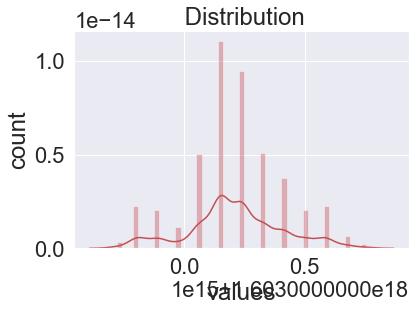

In [56]:
#6) Distribution plot 
sns.distplot(df.date,hist=True,color='r',label='orderval')
plt.title(' Distribution')
plt.xlabel('values')
plt.ylabel('count')

In [37]:
# First grouping based on "format"
# Within each team we are grouping based on "division_name"
gkk = df.groupby(['format', 'division_name'])
  
# Print the first value in each group
gkk.first()

date  order_no  orderval  rcvval  fillrate
format division_name                                                    
hm     Grocery Food     2020-10-15    9817.0    2641.4  2641.4       1.0
       Grocery Non Food 2020-10-21    9834.0    1080.6  1080.6       1.0
       Staples                 NaT       NaN       NaN     NaN       NaN
sm     Grocery Food     2020-10-15    3260.0     996.5   996.5       1.0
       Grocery Non Food 2020-10-15    2543.0    5410.0  5410.0       1.0
       Staples          2020-10-15    1537.0     333.3   333.3       1.0

In [75]:
df.date.value_counts()


2020-10-20    925
2020-10-21    792
2020-10-22    425
2020-10-19    422
2020-10-23    312
2020-10-16    190
2020-10-25    188
2020-10-24    172
2020-10-17    172
2020-10-18     95
2020-10-26     55
2020-10-15     26
2020-10-27     18
Name: date, dtype: int64

In [69]:
df.orderval[df.date== "2020-10-15"]

1536       333.3
1751      5400.0
3259       996.5
529       2463.6
3280       560.0
3291      5729.5
1109       287.1
363       1512.4
1987       373.3
1190      2578.0
574     721640.4
2870      6923.8
1652      4001.7
1949      2217.9
49         257.0
3061     58592.7
239       3615.2
2157       760.0
1250      1040.0
2542      5410.0
9816      2641.4
3205       451.6
105       4333.3
842        133.3
2940      1994.0
848       2346.4
Name: orderval, dtype: float64

### due to time churn didn't able to do further task.